## Basic code to generate paper figures

In [1]:
# %matplotlib widget
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
plt.style.use("../../../Python/actroot.mplstyle")
import numpy as np
import util as u
from importlib import reload

In [2]:
# Common settings
figsize = (3.5, 3.5)

### 1- Delta event

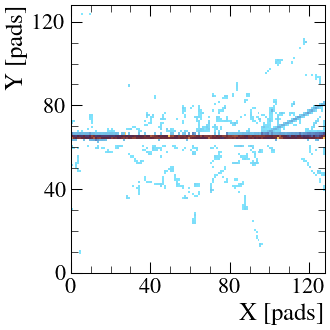

In [3]:
reload(u)
delta = u.DataInterface("../Events/run_160_entry_49121.root")

u.init_figure("delta", figsize=figsize)
plt.subplot(111)
mesh = delta.draw()
mesh.set_clim(vmax=8000)

plt.tight_layout()
plt.show()
# plt.gcf().savefig("./Outputs/delta_event.pdf")


### 2- Multifragmentation

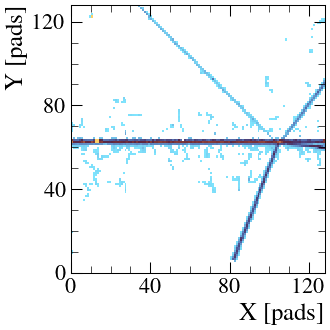

In [4]:
multi = u.DataInterface("../Events/run_155_entry_38.root")
u.init_figure("multi", figsize=figsize)
mesh = multi.draw()
mesh.set_clim(vmax=8000)

plt.tight_layout()
plt.show()
# plt.gcf().savefig("./Outputs/multi_event.pdf")

### 3- 3D plot

/tmp/ipykernel_36085/3877705347.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


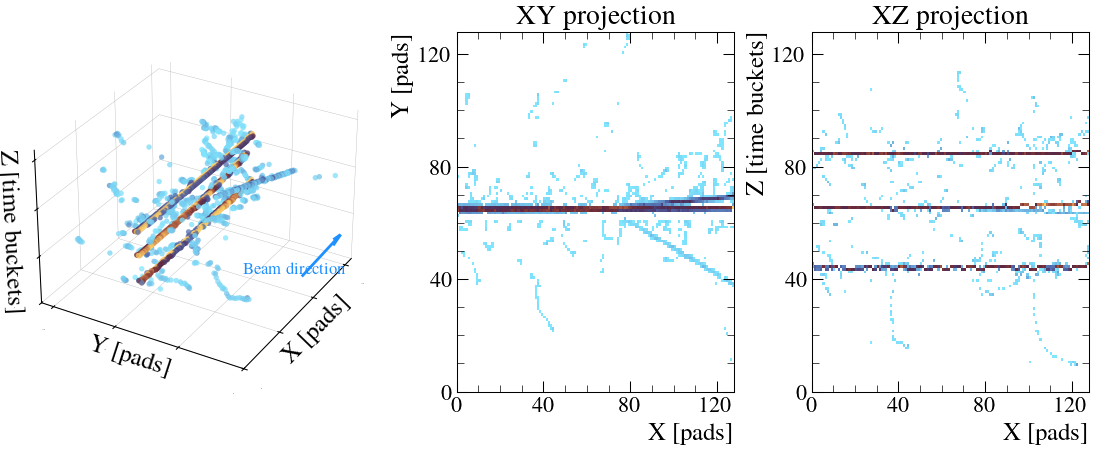

In [3]:
reload(u)

d3 = u.DataInterface("../Events/run_155_entry_1296.root")

plt.rcParams['grid.linestyle'] = '-'
plt.rcParams["grid.linewidth"] = 0.25

fig = u.init_figure("3d", figsize=(12, 4))
# Grid spec
gs = fig.add_gridspec(1, 3, width_ratios=[0.4, 0.3, 0.3], top=0.95, bottom=0.05, left=0.05, right=0.95)
ax = fig.add_subplot(gs[0], projection="3d")
plt.sca(ax)
scat = d3.draw_3d()
# Colobar
# cbar = fig.colorbar(scat, ax=ax, orientation="horizontal", pad=0.075, shrink=0.6)
# cbar.set_label("Charge [a.u]")
# cbar.ax.set_position([0.2, 1.05, 0.6, 0.3])
#Grid
ax.minorticks_off()
ax.zaxis.set_minor_locator(plt.NullLocator())
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.view_init(elev=30, azim=-150)
# # Adjust the position of the 3D subplot to reduce whitespace
# pos = ax.get_position()  # Get the current position of the 3D subplot
# ax.set_position([pos.x0 + 0.05, pos.y0 + 0.05, pos.width - 0.2, pos.height - 0.2])  # Adjust position)
# Annotation
ax.quiver(75, 5, 20, 50, 1, 1, color='dodgerblue', linewidth=2, arrow_length_ratio=0.2)  # Draw the arrow
ax.text(75, 10, 24, 'Beam direction', color='dodgerblue', fontsize=12, ha='center', va="center")  # Add text under the arrow
ax.tick_params(axis="both", labelsize=0, length=0)
padding = -10
ax.set_xlabel("X [pads]", fontsize=18, labelpad=padding)
ax.set_ylabel("Y [pads]", fontsize=18, labelpad=padding)
ax.set_zlabel("Z [time buckets]", fontsize=18, labelpad=padding)

# 2d projections
ax2 = fig.add_subplot(gs[1])
d3.draw()
plt.title("XY projection", fontsize=20)
ax3 = fig.add_subplot(gs[2])
d3.draw(False, "xz")
plt.title("XZ projection", fontsize=20)

fig.tight_layout()
fig.subplots_adjust(wspace=0.25)
fig.savefig("./Outputs/whole_3d.pdf", pad_inches=0.2)
plt.show()
# Save each subplot separately
labels = ["pure_3d", "good_event"]
for a, label in zip([ax, ax2], labels):
    extent = a.get_tightbbox(fig.canvas.renderer).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(f"./Outputs/{label}.pdf", bbox_inches=extent.expanded(1.05, 1.05))

### Elastic event

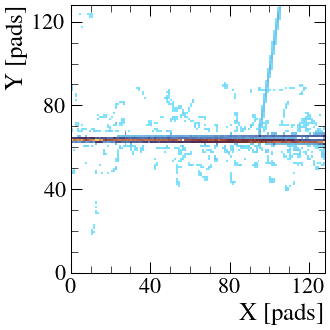

In [6]:
el = u.DataInterface("../Events/run_155_entry_630.root")
u.init_figure("elastic", figsize=figsize)
mesh = el.draw()
mesh.set_clim(vmax=8000)

plt.tight_layout()
plt.savefig("./Outputs/elastic.png", dpi=200)
plt.show()